In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
model_names = ['resnet18', 'vgg11', 'vgg11_bn', 'resnet34', 'densenet121']
results = {}
for model_name in model_names:
    file = open(f'results/{model_name}.json')
    results[model_name] = json.load(file)

In [3]:
def get_title(s):
    s = s.split("_")
    return ' '.join([x.capitalize() for x in s])

In [4]:
def plot_result(results, model_name):
    plt.figure()
    result = results[model_name]
    plt.title(f'Severity of corruption functions vs accuracy of {get_title(model_name)}')
    severities = np.arange(5)+1
    plt.xticks(severities)
    for key in result.keys():
        if key == 'plain':
#             print(results)
            plt.axhline(result[key], linestyle='--', label="Accuracy on original test dataset")
            continue
        label = get_title(key)
        plt.plot(severities, list(result[key].values()), label=label)
        plt.xlabel("Severity")
        plt.ylabel("Accuracy")
        plt.legend()
    plt.savefig(f'{model_name}_plot.png')

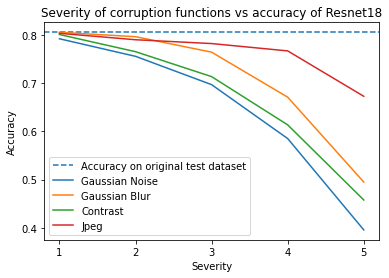

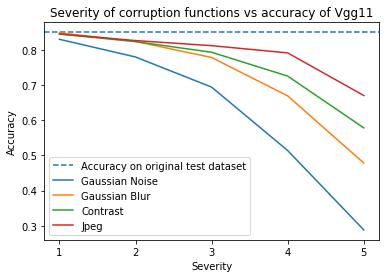

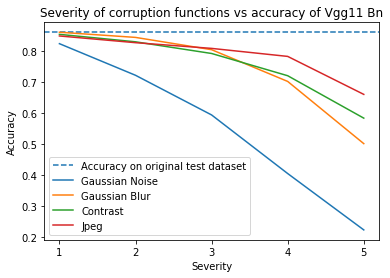

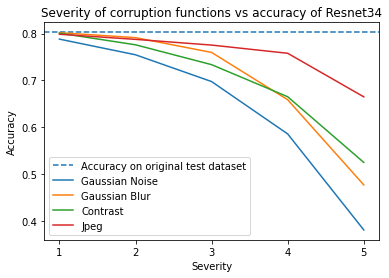

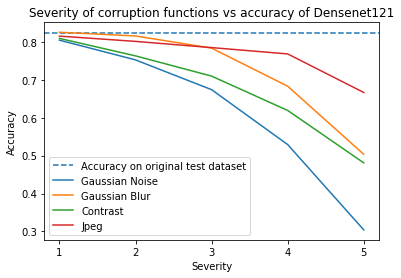

In [5]:
for model_name in model_names:
    plot_result(results, model_name)

In [6]:
sum(list(results['vgg11_bn']['gaussian_noise'].values()))

2.762219551282051

In [7]:
sum(list(results['resnet18']['gaussian_noise'].values()))

3.224659455128205

In [44]:
def calc_error(results, model_name, corruption):
    
    errors = 1-np.array(list(results[model_name][corruption].values()))
    norm = 1-np.array(list(results['resnet18'][corruption].values()))
    ce = sum(errors)/sum(norm)
    
    errors2 = [x - (1-results[model_name]['plain']) for x in errors]
    norm2 = [x - (1-results['resnet18']['plain']) for x in norm]
    rce = sum(errors2)/sum(norm2)
    
    return ce, rce
        

In [68]:
noises = ['gaussian_noise', 'gaussian_blur', 'contrast', 'jpeg']
CE = []
RCE = []
for i in range(len(model_names)):
    arr = []
    arr2 = []
    for c in noises:
        ce, rce = calc_error(results, model_names[i], c)
        arr.append(ce)
        arr2.append(rce)
    CE.append(arr)
    RCE.append(arr2)
CE = np.array(CE)
RCE = np.array(RCE)

In [69]:
CE

array([[1.        , 1.        , 1.        , 1.        ],
       [1.06595205, 0.95268612, 0.7469192 , 0.88726566],
       [1.26047955, 0.88007908, 0.74279123, 0.90905252],
       [1.01026798, 1.02883829, 0.90875979, 1.02448911],
       [1.09049365, 0.94566403, 0.98081709, 0.98159095]])

In [70]:
RCE

array([[1.        , 1.        , 1.        , 1.        ],
       [1.42898189, 1.31750202, 0.71805124, 1.43826579],
       [1.9128045 , 1.18815683, 0.77091663, 1.76013195],
       [1.00836977, 1.06224737, 0.76040278, 1.08246937],
       [1.30530918, 1.00869038, 1.07759514, 1.2931197 ]])

In [62]:
np.mean(CE, axis=1)

array([1.        , 0.91320576, 0.9481006 , 0.99308879, 0.99964143])

In [63]:
np.mean(RCE, axis=1)

array([1.        , 1.22570023, 1.40800248, 0.97837232, 1.1711786 ])

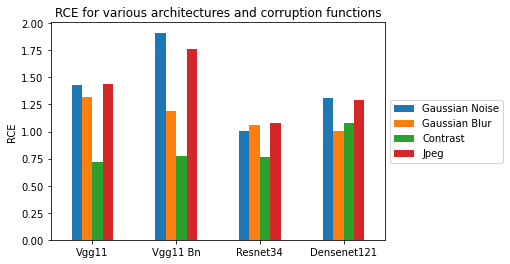

In [64]:
df = pd.DataFrame(RCE, columns=[get_title(x) for x in noises], index=[get_title(x) for x in model_names])
df = df.drop(get_title('resnet18'))
df.rename_axis("model")
df = df.reset_index()
df.plot(kind= 'bar', rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('RCE for various architectures and corruption functions')
plt.ylabel("RCE")
plt.xticks(np.arange(4),[get_title(x) for x in model_names[1:]])
plt.savefig('rce.png',  bbox_inches='tight')

In [65]:
df

,index,Gaussian Noise,Gaussian Blur,Contrast,Jpeg
0,Vgg11,1.428982,1.317502,0.718051,1.438266
1,Vgg11 Bn,1.912804,1.188157,0.770917,1.760132
2,Resnet34,1.008370,1.062247,0.760403,1.082469
3,Densenet121,1.305309,1.008690,1.077595,1.293120


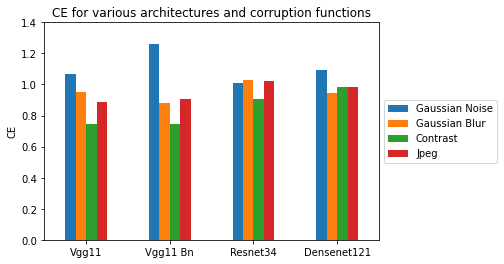

In [66]:
df = pd.DataFrame(CE, columns=[get_title(x) for x in noises], index=[get_title(x) for x in model_names])
df = df.drop(get_title('resnet18'))
df.rename_axis("model")
df = df.reset_index()
df.plot(kind= 'bar', rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('CE for various architectures and corruption functions')
plt.ylabel("CE")
plt.ylim([0,1.4])
plt.xticks(np.arange(4),[get_title(x) for x in model_names[1:]])
plt.savefig('ce.png',  bbox_inches='tight')

In [67]:
df

,index,Gaussian Noise,Gaussian Blur,Contrast,Jpeg
0,Vgg11,1.065952,0.952686,0.746919,0.887266
1,Vgg11 Bn,1.260480,0.880079,0.742791,0.909053
2,Resnet34,1.010268,1.028838,0.908760,1.024489
3,Densenet121,1.090494,0.945664,0.980817,0.981591


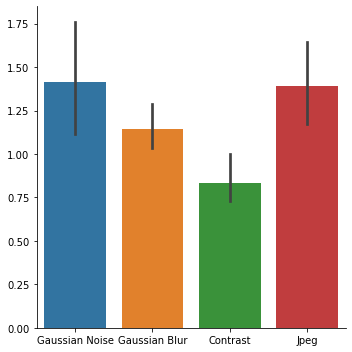

In [13]:
g = sns.catplot(
    data=df, kind="bar")

In [237]:
df = df.reset_index()

In [235]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
